In [12]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

import matplotlib.pyplot as plt

In [13]:
url = 'Dataset/harga_hp.csv'
data = pd.read_csv(url)

data.info()
# data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1000 non-null   object 
 1   model              1000 non-null   object 
 2   price_usd          1000 non-null   int64  
 3   ram_gb             1000 non-null   int64  
 4   storage_gb         1000 non-null   int64  
 5   camera_mp          1000 non-null   int64  
 6   battery_mah        1000 non-null   int64  
 7   display_size_inch  1000 non-null   float64
 8   charging_watt      1000 non-null   int64  
 9   5g_support         1000 non-null   object 
 10  os                 1000 non-null   object 
 11  processor          1000 non-null   object 
 12  rating             1000 non-null   float64
 13  release_month      1000 non-null   object 
 14  year               1000 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 117.3+ KB


In [14]:
print(data.isnull().sum())
print("Apakah data ada yang hilang?", data.isnull().values.any())

brand                0
model                0
price_usd            0
ram_gb               0
storage_gb           0
camera_mp            0
battery_mah          0
display_size_inch    0
charging_watt        0
5g_support           0
os                   0
processor            0
rating               0
release_month        0
year                 0
dtype: int64
Apakah data ada yang hilang? False


In [15]:
fitur_num = [
    "ram_gb","storage_gb","camera_mp","battery_mah",
    "display_size_inch","charging_watt","rating","year"
]
fitur_cat = ["5g_support","os"]

fitur = fitur_num + fitur_cat

x = data[fitur]
y = data["price_usd"]

# MENJADIKAN DATA TYPE BUKAN NUMERIK MENJADI KOLOM PATOKAN (one-hot)
x = pd.get_dummies(x, columns=fitur_cat, drop_first=True)
print("\nJumlah fitur setelah One-Hot:", x.shape[1])

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print(f"\nBENTUK DARI X_TRAIN : {x_train.shape}")
print(f"BENTUK DARI X_TEST  : {x_test.shape}")
print(f"BENTUK DARI Y_TRAIN : {y_train.shape}")
print(f"BENTUK DARI Y_TEST  : {y_test.shape}")


Jumlah fitur setelah One-Hot: 10

BENTUK DARI X_TRAIN : (800, 10)
BENTUK DARI X_TEST  : (200, 10)
BENTUK DARI Y_TRAIN : (800,)
BENTUK DARI Y_TEST  : (200,)


In [16]:
model = LinearRegression()

# MELATIH MODEL
model.fit(x_train, y_train)

# PREDIKSI MENGGUNAKAN DATA TEST
y_pred = model.predict(x_test)

# %%
# =========================
# 7. EVALUASI METRIK (Minggu 5)
# =========================
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("\n===== HASIL EVALUASI =====")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared (R2):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


===== HASIL EVALUASI =====
Mean Squared Error (MSE): 178638.54675528058
Root Mean Squared Error (RMSE): 422.65653520947785
R-Squared (R2): -0.029236279616892125
Mean Absolute Percentage Error (MAPE): 0.8973688903717842


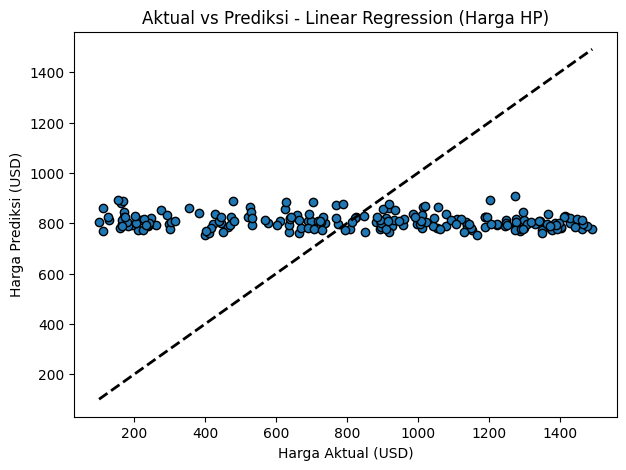

In [17]:


# %%
# =========================
# 8. VISUALISASI MODEL
# =========================
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, edgecolors=(0,0,0))
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', lw=2)
plt.xlabel("Harga Aktual (USD)")
plt.ylabel("Harga Prediksi (USD)")
plt.title("Aktual vs Prediksi - Linear Regression (Harga HP)")
plt.show()